### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

My GitHub repository link: https://github.com/alexs178/LSE_DA_NHS_analysis
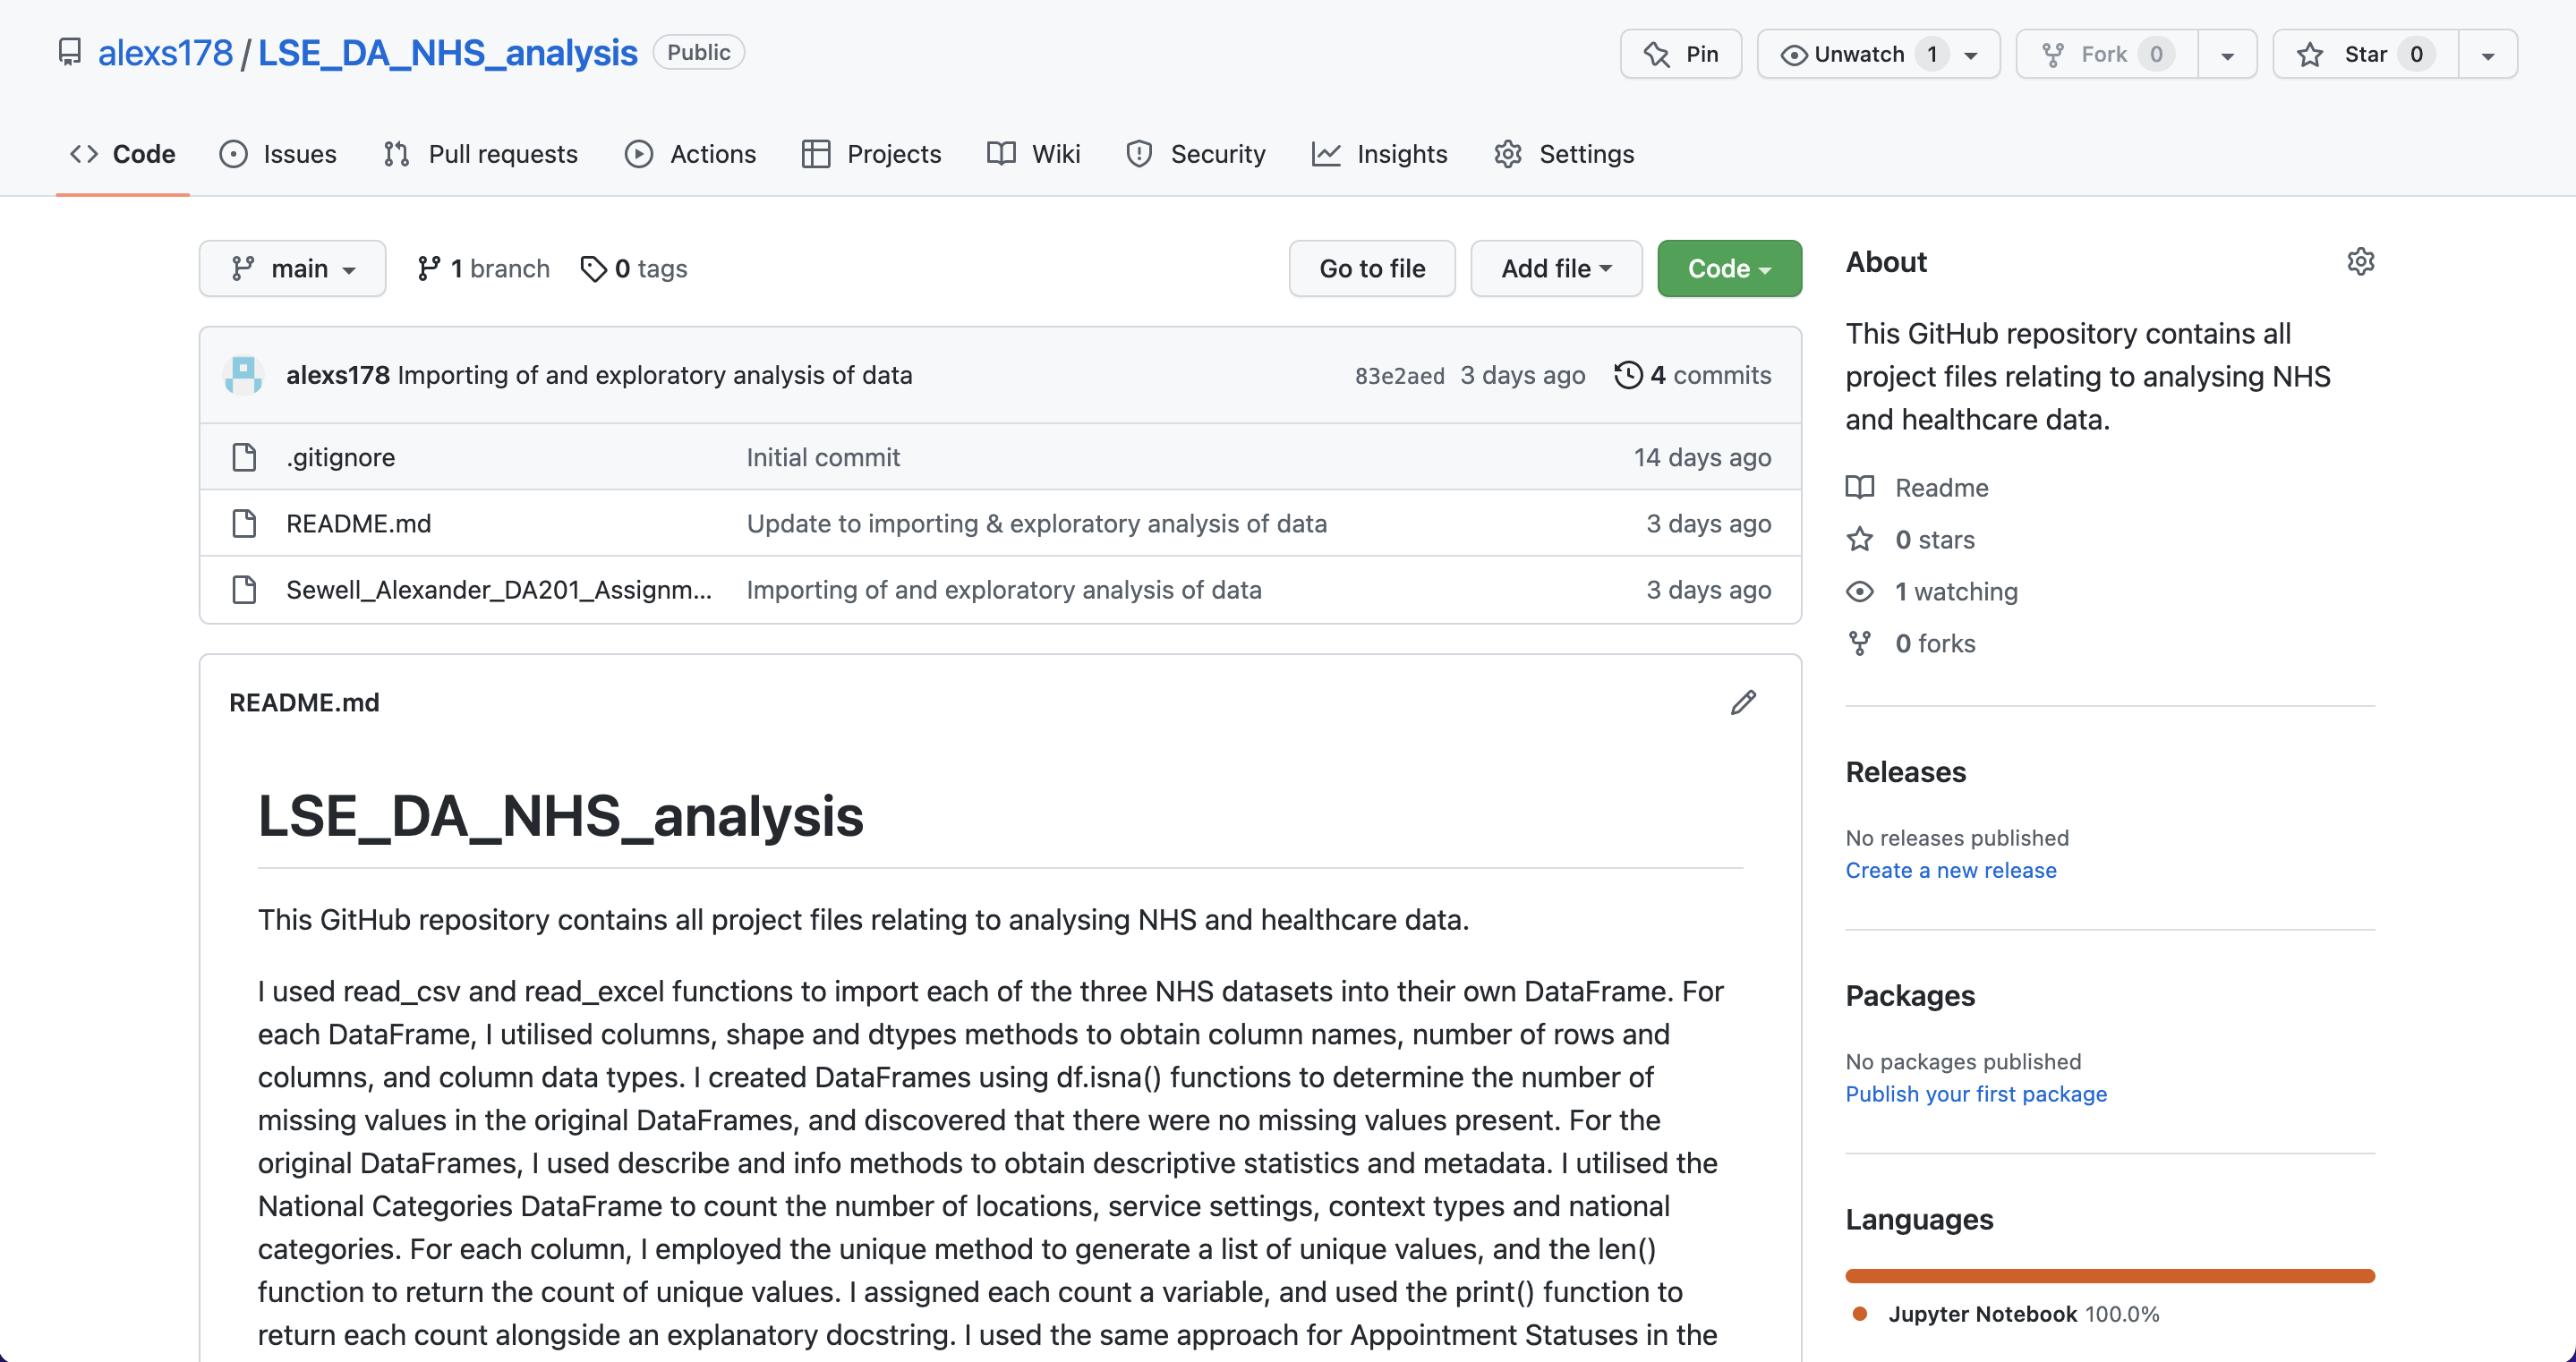

# 

# Assignment activity 2

### Prepare your workstation

In [80]:
# Import the necessary Pandas and NumPy libraries using import function and aliases.
import pandas as pd
import numpy as np

In [41]:
# Import the actual_duration.csv data set into a DataFrame as ad using the read_csv() function.
ad = pd.read_csv('actual_duration.csv')

# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(ad.columns)
# View the number of rows and columns using the print() function and shape method.
print(ad.shape)
# View the data types of each column using the print() function and dtypes method.
print(ad.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
ad.head()

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the Actual Duration DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
ad_na = ad[ad.isna().any(axis=1)]
# View how many rows in the Actual Duration DataFrame have missing values by using shape method
ad_na.shape

(0, 8)

This indicates there are no missing values in the Actual Duration DataFrame.

In [5]:
# Determine the metadata of the data set by using the info() function:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check the appointments_regional.csv data set as ar using the read_csv() function.
ar = pd.read_csv('appointments_regional.csv')

# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(ar.columns)
# View the number of rows and columns using the print() function and shape method.
print(ar.shape)
# View the data types of each column using the print() function and dtypes method.
print(ar.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
ar.head()

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [8]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the Appointments Regional DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
ar_na=ar[ar.isna().any(axis=1)]
# View how many rows in the Appointments Regional DataFrame have missing values by using shape method.
ar_na.shape

(0, 7)

This indicates there are no missing values in the Appointments Regional DataFrame.

In [9]:
# Determine the metadata of the data set by using the info() function:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [12]:
# Import and sense-check the national_categories.xlsx data set as nc using the read_excel() function.
nc = pd.read_excel('national_categories.xlsx')
# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(nc.columns)
# View the number of rows and columns using the print() function and shape method.
print(nc.shape)
# View the data types of each column using the print() function and dtypes method.
print(nc.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
nc.head()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [13]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the National Categories DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
nc_na=nc[nc.isna().any(axis=1)]
# View how many rows in the National Categories DataFrame have missing values by using shape method.
nc_na.shape

(0, 8)

This indicates there are no missing values in the National Categories DataFrame.

In [14]:
# Determine the metadata of the data set by using the info() function:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [15]:
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [16]:
# Determine the number of locations:
# Use unique() function to view list of locations, and len() function to count number of locations.
# Assign a variable to this count.
cnt_loc = len(nc['sub_icb_location_name'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of locations: ", cnt_loc)

Count of locations:  106


**Question 2:** What are the five locations with the highest number of records?



In [17]:
# Determine the top five locations based on record count:
# Use value_counts() function to generate table that displays number of records per location in descending order.
# Assign a variable to this table.
locations_most_records = nc['sub_icb_location_name'].value_counts()
# Use print() function to generate an appropriate docstring.
print("These are the five locations with the most records in the National Categories data set:")
# Use head() function to return the five locations with the most records.
locations_most_records.head()

These are the five locations with the most records in the National Categories data set:


NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [18]:
# Determine the number of service settings: 
# Use unique() function to view list of service settings, and len() function to count number of service settings.
# Assign a variable to this count.
cnt_serv_setting = len(nc['service_setting'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Service Settings: ", cnt_serv_setting)
# Use unique() function to view list of service settings.
nc['service_setting'].unique()

Count of Service Settings:  5


array(['Primary Care Network', 'Other', 'General Practice', 'Unmapped',
       'Extended Access Provision'], dtype=object)

The 5 service settings includes category for unmapped values.

In [19]:
# Determine the number of context types:
# Use unique() function to view list of context types, and len() function to count number of context types.
# Assign a variable to this count.
cnt_context_type = len(nc['context_type'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Context Types: ", cnt_context_type)
# Use unique() function to view list of context types.
nc['context_type'].unique()

Count of Context Types:  3


array(['Care Related Encounter', 'Unmapped', 'Inconsistent Mapping'],
      dtype=object)

The 3 context types include categories for unmapped and inconsistently mapped values.

In [20]:
# Determine the number of national categories:
# Use unique() function to view list of national categories, and len() function to count number of \ 
# national categories. Assign a variable to this count.
cnt_nat_cat = len(nc['national_category'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of National Categories: ", cnt_nat_cat)
# Use unique() function to view list of national categories.
nc['national_category'].unique()

Count of National Categories:  18


array(['Patient contact during Care Home Round', 'Planned Clinics',
       'Home Visit', 'General Consultation Acute',
       'Structured Medication Review', 'Care Home Visit', 'Unmapped',
       'Clinical Triage', 'Planned Clinical Procedure',
       'Inconsistent Mapping',
       'Care Home Needs Assessment & Personalised Care and Support Planning',
       'General Consultation Routine',
       'Service provided by organisation external to the practice',
       'Unplanned Clinical Activity', 'Social Prescribing Service',
       'Non-contractual chargeable work',
       'Group Consultation and Group Education', 'Walk-in'], dtype=object)

The 18 national categories include categories for unmapped and inconsistently mapped values.

In [21]:
# Determine the number of appointment status:
# Use unique() function to view list of appointment statuses, and len() function to count number of \
# appointment statuses. Assign a variable to this count.
cnt_app_status = len(ar['appointment_status'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Appointment Statuses: ", cnt_app_status)
# Use unique() function to view list of appointment statuses.
ar['appointment_status'].unique()

Count of Appointment Statuses:  3


array(['Attended', 'DNA', 'Unknown'], dtype=object)

The 3 appointment statuses includes category for unknown values.

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [42]:
# Use the dtypes function to view the data type of appointment_date in the ad DataFrame.
print(ad.dtypes)
# View the first five rows of appointment_date for the ad DataFrame to determine the date format by using head().
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


The data type of appointment_date in the ad DataFrame needs to be amended to datetime64[ns].

In [43]:
# Use the dtypes function to view the data type of appointment_date in the nc DataFrame.
print(nc.dtypes)
# View the first five rows of appointment_date for the nc DataFrame to determine the date format by using head().
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


The data type of appointment_date in the nc DataFrame doesn't need to be amended.

In [81]:
# Use the dtypes function to view the data type of appointment_month in the ar DataFrame.
print(ar.dtypes)
# View the first five rows of appointment_month for the ar DataFrame to determine the date format by using head().
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


appointment_month does not contain date information, and so can't be converted to the data type datetime64[ns].

In [44]:
# Change the date format of ad['appointment_date'] to datetime64[ns] by using the astype() function.
ad['appointment_date'] = ad['appointment_date'].astype('datetime64[ns]')

# View the DateFrame's data types to confirm the change worked.
print(ad.dtypes)
# View the DateFrame's first 5 rows to confirm the change worked.
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


The data type of appointment_date in the ad DataFrame was successfully changed to datetime64[ns].

In [53]:
# Use min() and max() functions to calculate the minimum and maximum dates in the ad DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first date an appointment was booked in the ad DataFrame is: ", ad["appointment_date"].min())
print("The last date an appointment was booked in the ad DataFrame is: ", ad["appointment_date"].max())

The first date an appointment was booked in the ad DataFrame is:  2021-12-01 00:00:00
The last date an appointment was booked in the ad DataFrame is:  2022-06-30 00:00:00


In the ad DataFrame, the first date of scheduled appointments is 1st December 2021. 
The last date of scheduled appointments is 30th June 2022.

In [54]:
# Use min() and max() functions to calculate the minimum and maximum dates in the nc DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first date an appointment was booked in the nc DataFrame is: ", nc["appointment_date"].min())
print("The last date an appointment was booked in the nc DataFrame is: ", nc["appointment_date"].max())

The first date an appointment was booked in the nc DataFrame is:  2021-08-01 00:00:00
The last date an appointment was booked in the nc DataFrame is:  2022-06-30 00:00:00


In the nc DataFrame, the first date of scheduled appointments is 1st August 2021. 
The last date of scheduled appointments is 30th June 2022.

In [82]:
# Use min() and max() functions to calculate the first and last appointment_month in the ar DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first month an appointment was booked in the ar DataFrame is: ", ar['appointment_month'].min())
print("The last month an appointment was booked in the ar DataFrame is: ", ar['appointment_month'].max())

The first month an appointment was booked in the ar DataFrame is:  2020-01
The last month an appointment was booked in the ar DataFrame is:  2022-06


In the ar DataFrame, the first month of scheduled appointments is January 2020, and the last month is June 2022.

Amongst all 3 data sets, appointments were scheduled between January 2020 and 30th June 2022.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [62]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Create a subset of the nc DataFrame, using the loc() function to filter the DataFrame on sub_icb_location_name \
# and on appointment_date.
nc_subset = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')
                  & (nc['appointment_date'] >= '2022-01-01')
                  & (nc['appointment_date'] <= '2022-06-01')]
# Use the groupby() and sum() functions to calculate total appointments for each service setting in the subset.
# Use sort_values() function to display output in descending order.
nc_subset.groupby('service_setting')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending = False)

,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


General Practice was the most popular service setting for NHS North West London from 1 January - 1 June 2022.

**Question 3:** Which month had the highest number of appointments?

In [70]:
# Use the ar DataFrame, as this is the only DataFrame which contains all 30 months in the reporting period.
# Use the groupby() and sum() functions to calculate total appointments per month. 
# Use the sort_values() function to arrange the output in descending order.
ar.groupby('appointment_month')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending = False)

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2020-10,28301932
2022-05,27495508
2021-03,27225424
2020-01,27199296
2021-06,26784182


November 2021 had the highest number of appointments.

**Question 4:** What was the total number of records per month?

In [72]:
# Use the value_counts() function to calculate the total number of records per month in the ar DataFrame.
ar['appointment_month'].value_counts()

2020-03    21350
2020-01    20889
2021-11    20766
2020-02    20689
2021-10    20562
2022-03    20532
2021-09    20441
2021-12    20393
2022-05    20276
2022-06    20231
2022-01    20225
2022-02    20133
2020-10    20122
2022-04    20073
2020-09    20043
2021-07    19899
2021-06    19814
2021-08    19786
2020-11    19675
2020-07    19502
2021-04    19452
2020-12    19394
2021-05    19384
2021-03    19369
2021-01    19319
2020-08    19247
2020-04    19124
2021-02    18949
2020-06    18844
2020-05    18338
Name: appointment_month, dtype: int64

In [73]:
# Use the value_counts() function to calculate the total number of records per month in the nc DataFrame.
nc['appointment_month'].value_counts()

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

In [79]:
# The ad DataFrame does not contain appointment_month like the other DataFrames.
# Instead, use the groupby and dt methods to group the DataFrame by month. 
# Then use the count() function to count the number of records per month.
# Use the sort_values() function to sort the output in descending order.
ad.groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month])[['actual_duration']].count() \
.sort_values('actual_duration', ascending = False)

actual_duration
appointment_date appointment_date                 
2022             3                           21236
                 5                           20128
                 1                           19643
2021             12                          19507
2022             6                           19227
                 4                           19078
                 2                           18974

In each DataFrame, the month of March always had the most records (March 2022 for the ad and nc DataFrames,
and March 2020 for the ar DataFrame).

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [ ]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [ ]:
# Change the data type of the appointment month to string to allow for easier plotting.


In [ ]:
# Aggregate on monthly level and determine the sum of records per month.


# View output.


**Service settings:**

In [ ]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.


**Context types:**

In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.


**National categories:**

In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.


**Autumn (October 2021):**

In [ ]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.


**Winter (January 2022):**

In [ ]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.


**Spring (April 2022):**

In [ ]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.


# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [ ]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [ ]:
# Load the data set.


# View the DataFrame.


In [ ]:
# Explore the metadata.


In [ ]:
# Explore the data set.


In [ ]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [ ]:
# Create a new DataFrame containing only the text.


# View the DataFrame.


In [ ]:
# Loop through the messages, and create a list of values containing the # symbol.


In [ ]:
# Display the first 30 records.


In [ ]:
# Convert the series to a DataFrame in preparation for visualisation.


# Rename the columns.


In [ ]:
# Fix the count datatype.


# View the result.


In [ ]:
# Display records where the count is larger than 10.


In [ ]:
# Create a Seaborn barplot indicating records with a count >10 records.


In [ ]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.


In [ ]:
# Print the min and max dates.


In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.


# View the DataFrame.


In [ ]:
# Determine the total number of appointments per month.


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


In [ ]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


In [ ]:
# Plot monthly capacity utilisation.


# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.


**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.


**Question 6:** How do the spread of service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


In [1]:
# Create a boxplot to investigate spread of service settings.


In [ ]:
# Create a boxplot to investigate the service settings without GP.


# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.